In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    'E:\\New folder\\New Data Set\\train',
    target_size=(150, 150), # Resize images to a consistent size
    batch_size=32,
    class_mode='binary', # Binary classification
    shuffle=True
)

# Load and prepare testing data
test_generator = test_datagen.flow_from_directory(
    'E:\\New folder\\New Data Set\\test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 9637 images belonging to 2 classes.
Found 7660 images belonging to 2 classes.


In [3]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer, 1 neuron for binary classification


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20, 
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/20
302/302 [==============================] - 783s 3s/step - loss: 0.5137 - accuracy: 0.7465 - val_loss: 0.4595 - val_accuracy: 0.7722
Epoch 2/20
302/302 [==============================] - 298s 988ms/step - loss: 0.4584 - accuracy: 0.7732 - val_loss: 0.3965 - val_accuracy: 0.7953
Epoch 3/20
302/302 [==============================] - 304s 1s/step - loss: 0.4315 - accuracy: 0.7903 - val_loss: 0.3992 - val_accuracy: 0.7937
Epoch 4/20
302/302 [==============================] - 298s 988ms/step - loss: 0.4127 - accuracy: 0.8010 - val_loss: 0.3837 - val_accuracy: 0.8205
Epoch 5/20
302/302 [==============================] - 315s 1s/step - loss: 0.3886 - accuracy: 0.8215 - val_loss: 0.4086 - val_accuracy: 0.7949
Epoch 6/20
302/302 [==============================] - 309s 1s/step - loss: 0.3626 - accuracy: 0.8320 - val_loss: 0.3848 - val_accuracy: 0.8133
Epoch 7/20
302/302 [==============================] - 301s 997ms/step - loss: 0.3499 - accuracy: 0.8392 - val_loss: 0.3898 - val_accurac

In [5]:
predictions = model.predict(test_generator)
predictions

array([[1.6809982e-01],
       [6.2608540e-02],
       [3.6505255e-06],
       ...,
       [8.7595141e-01],
       [8.1828344e-01],
       [9.4943810e-01]], dtype=float32)

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
predicted_classes = np.round(predictions).flatten()
true_classes = test_generator.classes

In [8]:
# Compute confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[3177 1072]
 [ 329 3082]]


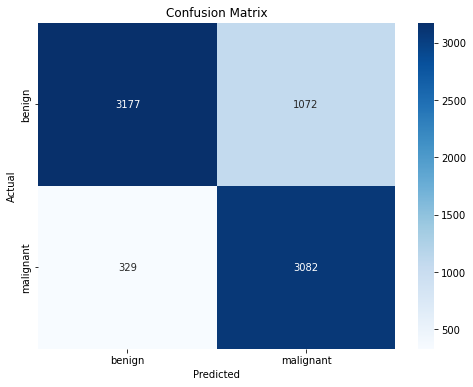

In [9]:
# Plot confusion matrix using Seaborn
class_names = ['benign', 'malignant']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 81.71%
Specificity: 74.77%


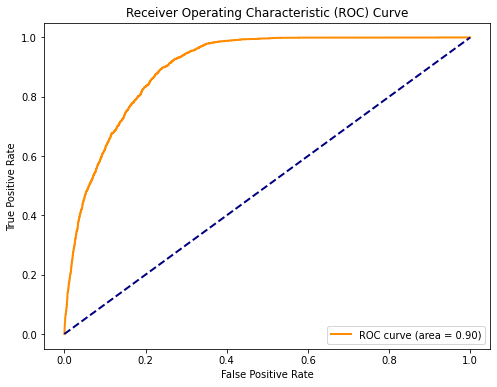

In [10]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Compute accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute specificity
tn, fp, fn, tp = confusion_mtx.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity * 100:.2f}%')

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
